In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('heartfail.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


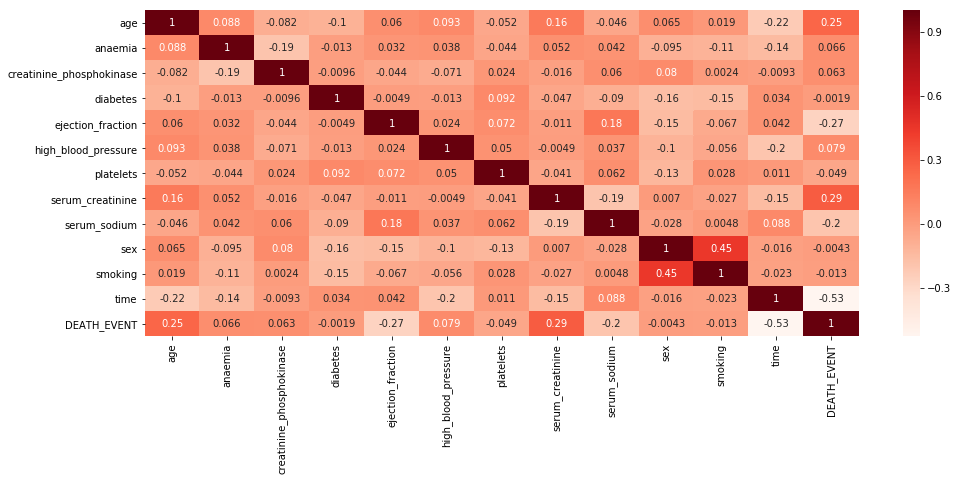

In [4]:
corr = df.corr()
plt.figure(figsize=(16,6))
sns.heatmap(corr,annot=True,cmap=plt.cm.Reds)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
Features = ['time','ejection_fraction','serum_creatinine', 'age', 'anaemia', 'high_blood_pressure']
x = df[Features].values
y = df["DEATH_EVENT"].values
#x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [7]:
from sklearn import preprocessing

In [8]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scale = min_max_scaler.fit_transform(x)

In [9]:
x_train,x_val_and_test,y_train,y_val_and_test = train_test_split(x_scale, y, test_size=0.2)

In [10]:
x_val, x_test, y_val, y_test = train_test_split(x_val_and_test, y_val_and_test, test_size=0.5)

In [11]:
from keras.models import Sequential
from keras.layers import Dense

C:\Users\USER\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.
C:\Users\USER\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\USER\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\USER\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is 

In [12]:
model = Sequential([Dense(10, activation='relu', input_shape=(6,)), Dense(10, activation='relu'), Dense(1, activation='sigmoid'),])

In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
hist = model.fit(x_train, y_train, batch_size=3, epochs=100, validation_data=(x_val, y_val))

Train on 239 samples, validate on 30 samples
Epoch 1/100
239/239 [==============================] - 1s 2ms/step - loss: 0.6717 - acc: 0.6820 - val_loss: 0.6544 - val_acc: 0.7000
Epoch 2/100
239/239 [==============================] - 0s 581us/step - loss: 0.6177 - acc: 0.6904 - val_loss: 0.5914 - val_acc: 0.7000
Epoch 3/100
239/239 [==============================] - 0s 447us/step - loss: 0.5793 - acc: 0.6904 - val_loss: 0.5705 - val_acc: 0.7000
Epoch 4/100
239/239 [==============================] - 0s 619us/step - loss: 0.5609 - acc: 0.6904 - val_loss: 0.5576 - val_acc: 0.7000
Epoch 5/100
239/239 [==============================] - 0s 615us/step - loss: 0.5467 - acc: 0.6904 - val_loss: 0.5477 - val_acc: 0.7000
Epoch 6/100
239/239 [==============================] - 0s 510us/step - loss: 0.5345 - acc: 0.6904 - val_loss: 0.5396 - val_acc: 0.7000
Epoch 7/100
239/239 [==============================] - 0s 556us/step - loss: 0.5218 - acc: 0.6904 - val_loss: 0.5349 - val_acc: 0.7000
Epoch 8/100


Epoch 61/100
239/239 [==============================] - 0s 481us/step - loss: 0.3620 - acc: 0.8619 - val_loss: 0.4278 - val_acc: 0.8667
Epoch 62/100
239/239 [==============================] - 0s 560us/step - loss: 0.3609 - acc: 0.8410 - val_loss: 0.4167 - val_acc: 0.8667
Epoch 63/100
239/239 [==============================] - 0s 418us/step - loss: 0.3626 - acc: 0.8410 - val_loss: 0.4285 - val_acc: 0.8667
Epoch 64/100
239/239 [==============================] - 0s 548us/step - loss: 0.3596 - acc: 0.8577 - val_loss: 0.4218 - val_acc: 0.8667
Epoch 65/100
239/239 [==============================] - 0s 753us/step - loss: 0.3601 - acc: 0.8536 - val_loss: 0.4253 - val_acc: 0.8667
Epoch 66/100
239/239 [==============================] - 0s 606us/step - loss: 0.3596 - acc: 0.8577 - val_loss: 0.4288 - val_acc: 0.8667
Epoch 67/100
239/239 [==============================] - 0s 548us/step - loss: 0.3598 - acc: 0.8494 - val_loss: 0.4239 - val_acc: 0.8667
Epoch 68/100
239/239 [==========================

In [15]:
model.evaluate(x_test, y_test)[1]

30/30 [==============================] - 0s 33us/step


0.8666666746139526

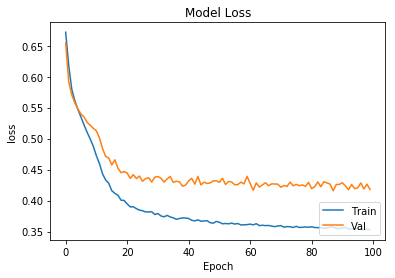

In [16]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

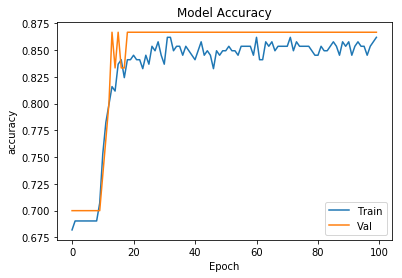

In [17]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()
